# Disciplina: Ciência de Dados (DCA-0131)
Prof. Luiz Affonso Guedes

### Departamento de Engenharia de Computação e Automação - DCA

UFRN - 2025

*OBS: Favor fazer cópia do notebook antes de alterá-lo.

## Aula 8 - Fundamentos de Estatística
- Conceitos de estatística, medidas (média, variância, desvio padrão, ...) e suas propriedades.

- Uso de funções estatísticas nos pacotes NumPy, Pandas e SciPy.

- Exemplos de aplicação.

## 1. Introdução às Distribuições Estatísticas com o Pacote SciPy

- Como gerar números aleatórios?
- O pacote stats do SciPy fornece uma gama de classes e métodos para se trabalhar com distribuições estatísticas discretas e contínuas.
- Importação do pacote

    from scipy import stats

In [115]:
# Importação do Pacote

from scipy import stats


In [116]:
# Geração de um número randômico seguindo uma distribuição normal de média ZERO e desvio padrão 1.
stats.norm.rvs()

np.float64(1.2787196140305366)

> O que significa gerar um número seguindo uma distribuição normal?

Significa que esse número vai ter mais chance de ficar próximo da média ($\mu$) dessa distribuição.

> Dada uma distribuição normal de média $\mu$ e desvio padrão $\sigma$, como seus limites são calculados?

Utilizando a PDF (*Function Density Probability*) dessa distribuição normal (definida abaixo), podemos "chutar" possíveis intervalos $[a,b]$ e acompanhar a probabilidade de alguma variável aleatória $X$ estar nesse intervalo. O intervalo que mais aproximar a integral abaixo de 100%, será os limites da distribuição.

$$P(a < X < b) = \int_{a}^{b} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]dx$$

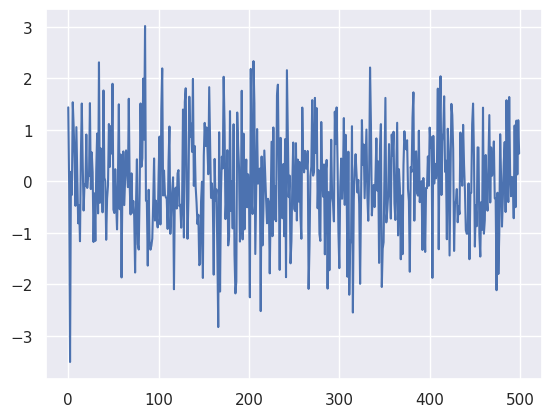

In [117]:
# Assinatura padrão para geração de números aleatórios seguindo distribuição normal
# .norm,  --> é a classe de distribuição normal
# .rvs()  --> método que gera os números aleatórios
# variável loc é a média no caso da distribuição normal
# variável scale é o desvio padrão no caso da distribuição normal
# variável size é o número de amostras geradas
# variável random_state é para geração da semente dos números
import matplotlib.pyplot as plt
import numpy as np

size = 10000
x = stats.norm.rvs(loc=0, scale=1, size=size, random_state=None)
#plt.plot(x)
plt.plot(x[:500]) # Para de plotar apenas os 500 primeiros pontos
plt.show()

In [118]:
x.std()

np.float64(1.0023863479678647)

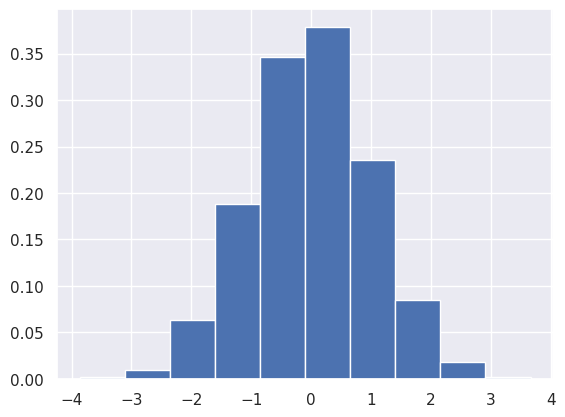

In [119]:
# Geração do gráfico do Histograma da variável aleatória x
#plt.hist(x, bins=int(1+3.22*np.log(size)), density=True) # calculando a quantidade de bins
#plt.hist(x, bins=10, density=True)
plt.hist(x, density=True)
plt.show()

In [120]:
# Geração de dois arrays com dados seguindo distribuições normais
a = 2
b = 3
c = 10
x1 = stats.norm.rvs(loc=1, scale=1, size=size, random_state=None)
x2 = stats.norm.rvs(loc=2, scale=2, size=size, random_state=None)
y = a*x1 + b*x2 + c

#y.mean()
y.var()

np.float64(39.84625554830142)

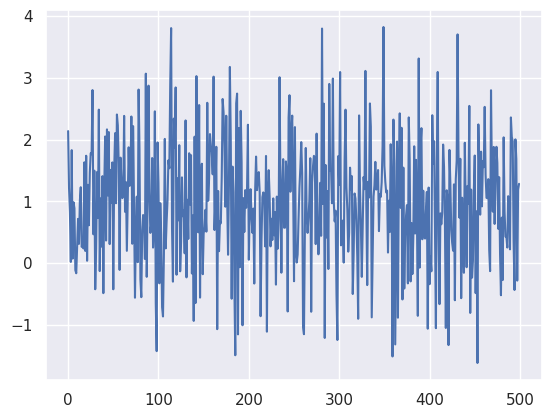

In [121]:
plt.plot(x1[:500])
plt.show()

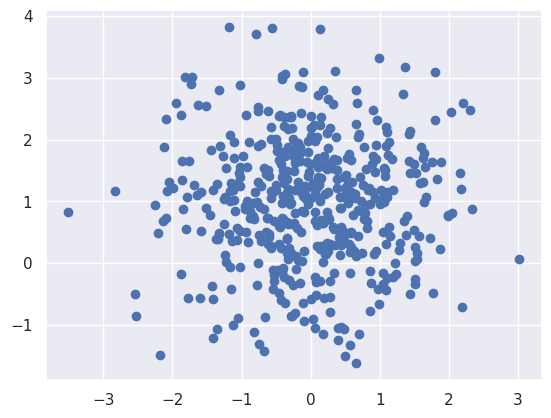

In [122]:
# Análise do gráfico de dispersão (correlação)
plt.scatter(x[:500], x1[:500])
plt.show()

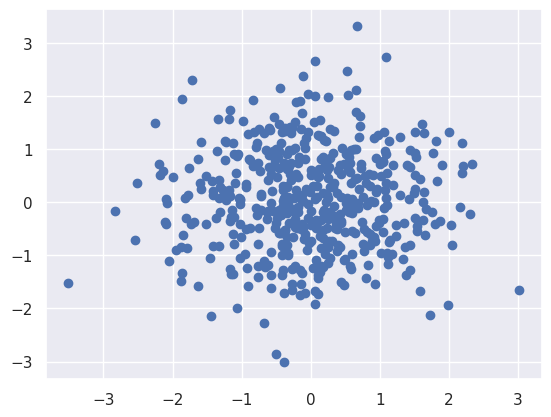

In [123]:
# Análise do gráfico de dispersão (correlação)
y = stats.norm.rvs(loc=0, scale=1, size=size, random_state=None)
plt.scatter(x[:500], y[:500])
plt.show()

In [124]:
# Geração de 7 números com distribuição normal de média 5 e desvio padrão 2

stats.norm.rvs(5,2,7)

array([5.61367687, 4.20385442, 3.29211878, 3.21746417, 5.31589202,
       7.13196061, 2.96185582])

Forneça o número de amostras 
Forneça a média da distribuição 
Forneça o desvio-padrão da distribuição 
Desvio-padrão =  0.0
Valor mínimo =  0.4947524999884184
Valor média =  0.4947524999884184
Valor variância =  0.0


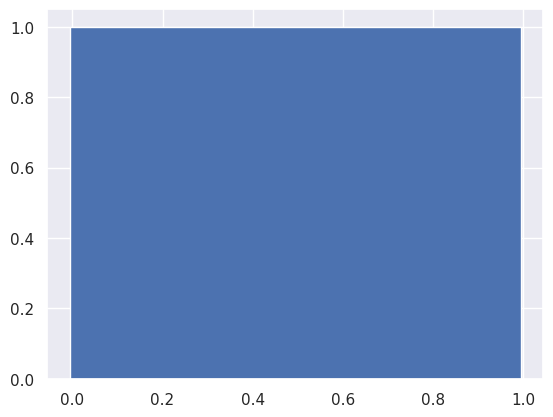

In [125]:
# Exemplo de geração e cálculo de medidas estatísticas

n = 100000
mu = 0
sigma = 10
print("Forneça o número de amostras ")
n = int(input())
print("Forneça a média da distribuição ")
mu = float(input())
print("Forneça o desvio-padrão da distribuição ")
sigma = float(input())

x = stats.norm.rvs(mu,sigma,n)
print("Desvio-padrão = " , x.std())
minimo = x.min()
print("Valor mínimo = ", minimo)
media = x.mean()
print("Valor média = ", media)
var = x.var()
print("Valor variância = ", var)

plt.hist(x, bins=int(round(1 + 3.22*np.log(n))))
plt.show()

## 1.1. Distribuições como Classes

- Lembrete: Python é uma linguagem orientada a objetos
- As distribuições são implementadas como classes.
- Essas classes possuem um conjunto de métodos com mesma assinatura.
- O pacote stas do SciPy impementa as principais distribuições estatísticas com os respectivos métodos.
    


### Métodos Básicos
Os principais métodos disponíveis para as distribuições são os seguintes:

    - rvs(loc=0, scale=1, size=1, random_state=None)    ---> geram números randômicos
    - pdf(x, loc=0, scale=1)                            ---> gera a função densidade de probabilidade
    - cdf(x, loc=0, scale=1)                            ---> gera a função cumulativa de probabilidade
    - ppf(q, loc=0, scale=1)                            ---> gera a função percentil, inversa da função cdf


### Métodos para Cálculo de Métricas Estatísticas
    - median(loc=0, scale=1) 	      ---> fornece a Mediana da distribuição.
    - mean(loc=0, scale=1) 	        ---> fornece a média da distribuição.
    - var(loc=0, scale=1) 	         ---> fornece a Variancia da distribuição.
    - std(loc=0, scale=1) 	         ---> fornece o Desvio Padrão da distribuição.

In [126]:
print('Obtém a média de uma distribuição normal com média zero e desvio padrão 1')
stats.norm.mean(0,1)

Obtém a média de uma distribuição normal com média zero e desvio padrão 1


np.float64(0.0)

In [127]:
print('Obtém o desvio padrõ de uma distribuição normal com média zero e desvio padrão 1')
stats.norm.std(0,1)

Obtém o desvio padrõ de uma distribuição normal com média zero e desvio padrão 1


np.float64(1.0)

In [128]:
# A distribuição é um objeto Scipy

dist1 = stats.norm(5,2)
dist1.mean()

np.float64(5.0)

In [129]:
print("Nunca se esqueça que Python é uma Linguagem Orientada a Objetos")
stats.norm.rvs(0,1,100000).mean()

Nunca se esqueça que Python é uma Linguagem Orientada a Objetos


np.float64(0.002517815100277134)

In [130]:
# obtenha o desvio padrão de dist2
dist2 = stats.norm(5,2)


std = dist2.std()
print(f"O desvio padrão é {std}")

O desvio padrão é 2.0


In [131]:
# gere 1000 amostras de dist2 e calcule a sua média e desvio padrão numéricos
dist2_samples = dist2.rvs(1000)
print('média = ' , dist2_samples.mean() )
print('desvio padrão = ' , dist2_samples.std() )

média =  4.995481811955628
desvio padrão =  2.032794811889049


## 2. Exercícios com Variáveis Aleatórias

### Exercício 1:
Experança - Média - Primeiro Momento - Propriedade da linearidade.

  -  $E[x+y] = E[x] + E[y]$
  -  $E[a.x] = a.E[x]$
  -  $E[ax+by] = a.E[x] + b.E[y]$

In [132]:
# Exercício 1
a = 2
b = 0
mx = 10
my = 20
x = stats.norm.rvs(mx,1,10000)
y = stats.norm.rvs(my,1,10000)
z = a*x + b*y


## Obtenha a média de x, y e z
mean_x = x.mean()
mean_y = y.mean()
mean_z = z.mean()

print(f"As médias calculada e numérica de x são: {mx} e {mean_x}")
print(f"As médias calculada e numérica de y são: {my} e {mean_y}")
print(f"As médias calculada e numérica de z são: {mx+my} e {mean_z}")

As médias calculada e numérica de x são: 10 e 10.015007214227657
As médias calculada e numérica de y são: 20 e 20.01699447864909
As médias calculada e numérica de z são: 30 e 20.030014428455313


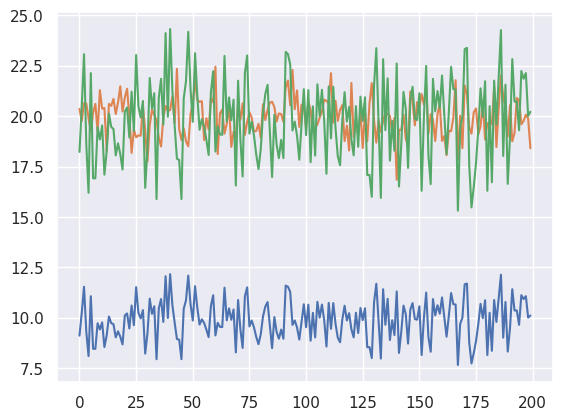

In [133]:
#plt.plot(x)
#plt.plot(x)
n1 = 200
plt.plot(x[:n1]) # Para de plotar apenas os n1 primeiros pontos
plt.plot(y[:n1]) # Para de plotar apenas os n1 primeiros pontos
plt.plot(z[:n1]) # Para de plotar apenas os n1 primeiros pontos
plt.show()

### Exercício 2:
Dada uma variável aleatória x e duas constantes a e b.

Se $y = a.x + b$

Então:

$
E[y] = a.E[x] + b
$

$
Var(y) = a^{2}.Var[x]
$

In [134]:
# Exercício 2
a = 1
b = 5
x = stats.norm.rvs(5,1,10000)  # Distribuição normal de média 5 e desvio padrão 1.

y = a * x + b

## Obtenha a média e variância de y

mean_y = y.mean()
var_y = y.var()

print(f"A média teórica (E[y] = a * E[x] + b) da distribuição é {a*5 + b} e a variância teórica (Var[y] = a² * Var[y]) é de {a*a*1}")
print(f"A média numérica da distribuição é {mean_y} e a variância numérica é de {var_y}")

A média teórica (E[y] = a * E[x] + b) da distribuição é 10 e a variância teórica (Var[y] = a² * Var[y]) é de 1
A média numérica da distribuição é 9.999548528733447 e a variância numérica é de 1.0088123761584384


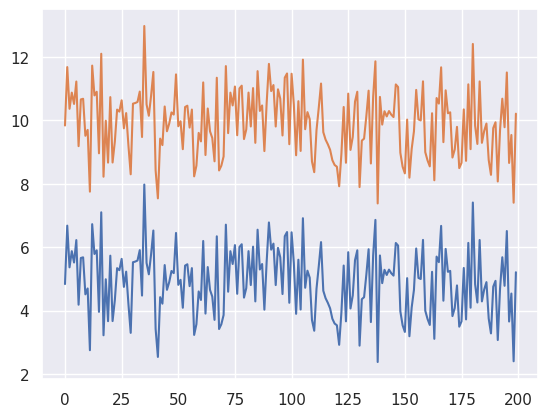

In [135]:
#plt.plot(x)
#plt.plot(x)
n1 = 200
plt.plot(x[:n1]) # Para de plotar apenas os n1 primeiros pontos
plt.plot(y[:n1]) # Para de plotar apenas os n1 primeiros pontos

plt.show()


### Exercício 3:
Reescreva o programa anterior para os seguintes cenários:
- a = -5;-4;-3;-2;-1;+1;+2:+3;+4;+5
- b =0

Plote o gráfico da média da variável aleatória y em função do valor de "a"

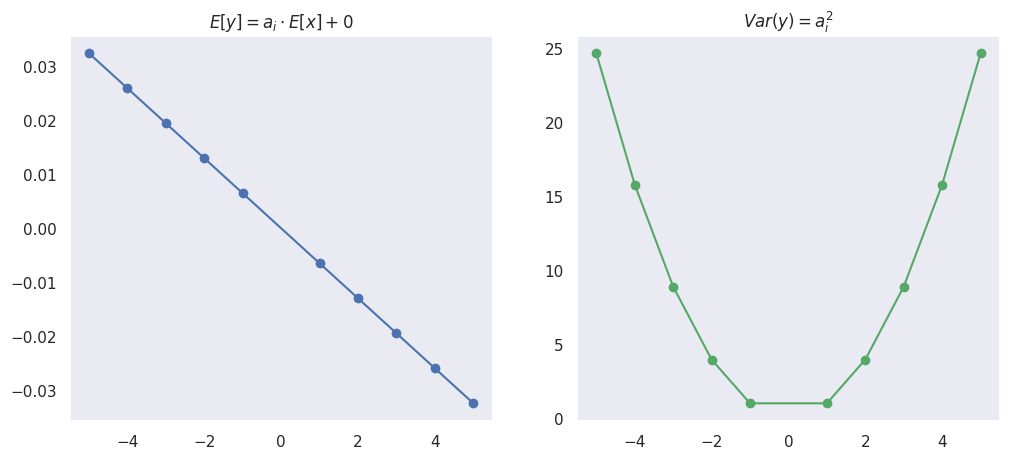

In [136]:
# Resolução do Exercício 3
x = stats.norm.rvs(0,1,10000)
a = [-5,-4,-3,-2,-1,1,2,3,4,5]
b = 0

# for i in range(len(a)):
#  y = a[i] * x + b
#  mean_y[i] = y.mean()
#  var_y[i] = y.var()

a = np.array(a, dtype=int)
mean_y = x.mean() * a + b
var_y = a * a * x.var()

# plotando a resposta
fig, ax = plt.subplots(1,2, figsize=(12, 5))

ax[0].plot(a,mean_y, 'ob-')
ax[0].grid()
ax[0].set_title('$E[y]=a_i \\cdot E[x] + 0$')

ax[1].plot(a,var_y, 'og-')
ax[1].grid()
ax[1].set_title('$Var(y)=a_i^2$')

plt.show()

### Exercício 4:
Dada duas variáveis aleatórias x e y e duas constantes c1 e c2. A variáveis aleatória z é dada por:
    
    
z = c1 * x + c2 * y

Qual é o valor da média e variância de z?

Escreva um programa para verificar a sua resposta.

In [137]:
# Implementação do Exercício 4
c1 = 2
c2 = 3
size = 10000
mu_x = 4
mu_y = 3
sigma_x = 1
sigma_y = 1
x = stats.norm.rvs(loc=mu_x, scale=sigma_x, size=size)
y = stats.norm.rvs(loc=mu_y, scale=sigma_y, size=size)

z = c1*x + c2*y # Obtenção dos valores da variável aleatória z

mean_z = z.mean()   # média calculada da variável aleatória z
var_z = z.var()     # variância calculada da variável aleatória z

t_var_z = c1*c1*x.var() + c2*c2*y.var() # variância teórica da variável aleatória z, considerando Cov(x,y) = 0
t_mean_z = c1*x.mean() + c2*y.mean()    # média teórica da variável aleatória z


print(f"A variância esperada de z é de {t_var_z}, e o valor teorico da sua média é {t_mean_z}")
print(f"A variância calculada de z é {var_z}, e a sua média calculada é {mean_z}")


A variância esperada de z é de 13.083207497276662, e o valor teorico da sua média é 17.04694251166175
A variância calculada de z é 13.090655027255925, e a sua média calculada é 17.04694251166175


### 2.1. Importância do número de amostra
O número de amostras (n) de uma variável aleatória tem impacto direto na precisão do cálculo das medidas estat'siticas (média, variânca, ...).

Execute o programa a seguir para vários valores de n e analise os resultados. suas conclusões.

In [138]:
# Exercício

print("Forneça o valor de n")
n = int(input())
media = 0
sigma = 1
x = stats.norm.rvs(media,sigma,n)

## Obtenha a média e variância numéricas de x

mean_x = x.mean()
var_x = x.var()

print(f"A média teórica é {media} e a variância teórica é de {sigma*sigma}")
print(f"A média numérica é {mean_x} e a variância numérica é de {var_x}")

Forneça o valor de n
A média teórica é 0 e a variância teórica é de 1
A média numérica é -0.061981792476836224 e a variância numérica é de 0.9112464971654447


### 2.2. Outros Métodos Importantes
- moment(n, loc=0, scale=1)   --> Momento não-central de ordem n.
- stats(loc=0, scale=1, moments='mvsk')  --> gera Mean(‘m’), variance(‘v’), skew(‘s’), e kurtosis(‘k’) da distribuição.

In [139]:
# Exemplo do uso do método moment sobre a distribuição normal
# No exemplo se obtém o segundo momento não-central de uma distribuição normal de média 2 e desvio padrão 3
stats.norm.moment(4,0,1)

np.float64(3.0)

### Exercício 5
Obtenção de terceiro momento

In [140]:
# Exercício 5: obtenha o terceiro momento não-central de uma distribuição normal padrão de média 1 e desvio padrão 1
print(stats.norm.moment(3, 0, 1))

0.0


In [141]:
# Exemplo do uso do método stats sobre a distribuição normal
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')

In [142]:
print(mean)
print(var)
print(skew)
print(kurt)

0.0
1.0
0.0
0.0


### 3. Covariância,  Correlação e Coeficiente de Correlação

- Correlação é uma medida numérica que indica a inter-dependência entre duas variáveis. Uma covariância de valor 0 indica que as variáveis são totalmente inter-dependentes. Um valor alto e positivo indica que uma variável será grande quando a outra for grande. E um valor alto negativo indica que uma variável é pequena quando a outro for grande.

- Conceitualmente dado duas variáveis X e Y, a Correlação fornece uma medida de dispersão dessas duas variáveis em relação aos seus pontos de origem.

    - Corr(X,Y) = E[X.Y]

- Enquanto que conceitualmente a Covariância é a dispersão dessas duas variáveis em relação às suas médias.

    - Cov(X,Y) = E{ (X-E[X]) (Y-E[Y]) }
  
    - Cov(X,Y) = E{ (X-mx) (Y-my)}
  
- A relação matemática entre Covariância e Correlação é dada por:

    - Cov(X,Y) = Corr(X,Y) - mx.my

- Como o entendimento dos valores de covariância ou correlação podem se tornar complexo, principalmente para comparação entre duas medidas de covariância distintas, utiliza-se o coeficiente de correlação como outra forma de medir a inter-dependência entre duas variáveis.

- Coeficiente de Correlação é também uma medida de inter-dependência entre duas variáveis. Contudo, como seu valor varia de -1 a 1, fica mais fácil fazer comparações entre medidas de correlação. Um correlação de -1 indica anti-correção perfeita, enquanto que, um valor de 1 indica uma correlação perfeita entre duas variáveis.
    - coef_corr(X,Y) = Cov(X,Y)/ ( σ(X) σ(Y) )



#### Exemplos com os Conceitos de Correlação e Covariância:

Dado duas variáveis aleatórias independentes, x e y.

Pode-se gerar variáveis aleatórias dependentes de x e y via operações aritiméticas
  - z = a*x + b*y
  - w = c*x + d*y


In [143]:
# Exercício:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

n = 10000
mx = 10
sigmax = 1
my = 20
sigmay = 2
x = stats.norm.rvs(mx,sigmax, n) # x e y são independentes entre si.
y = stats.norm.rvs(my,sigmay, n)

# Gerando duas variáveis aleatória correlacionadas a partir de duas descorrelacionadas
teta = np.pi/3
a = np.cos(teta)
b = np.sin(teta)
c = -np.sin(teta)
d = np.cos(teta)
z = a*x + b*y
w = c*x + d*y

print("Concluído")


Concluído


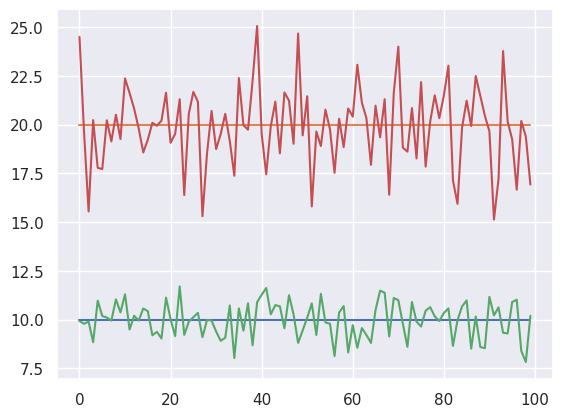

In [144]:
# Exercício:
# Plote dos valores de x e y
n1 = 100 # número de pontos a serem plotados
plt.plot(mx*np.ones(len(x))[:n1])   # reta com a média de x
plt.plot(my*np.ones(len(x))[:n1])   # reta com a média de y
plt.plot(x[:n1])                   # Para de plotar apenas os n1 primeiros pontos
plt.plot(y[:n1])                   # Para de plotar apenas os n1 primeiros pontos

plt.show()

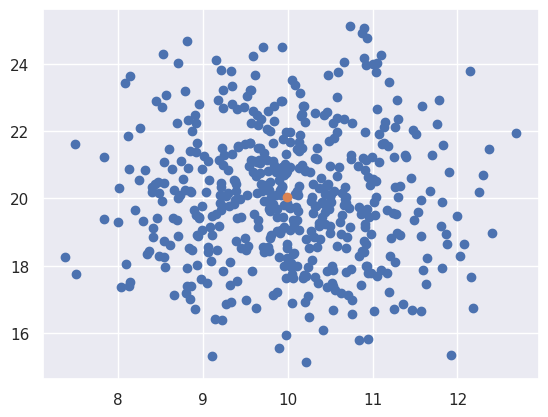

In [145]:
# Exercício:
# Plote de pontos (scatter) dos valores de x e y
n1 = 500 # número de pontos a serem plotados
plt.scatter(x[:n1],y[:n1])      # Para de plotar apenas os n1 primeiros pontos
plt.scatter(x.mean(),y.mean())  # Ponto central

plt.show()

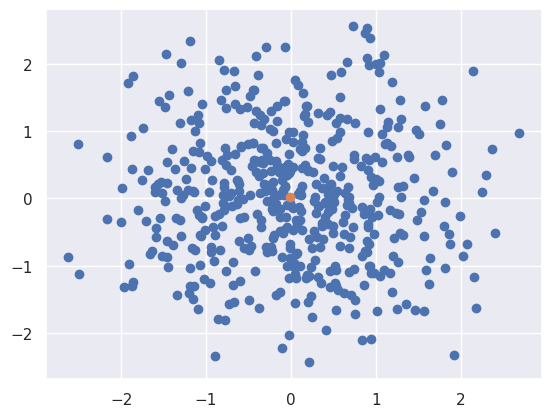

In [146]:
# Exercício:
# Plote de pontos (scatter) dos valores centralizados e normalizados de x e y
n1 = 500 # número de pontos a serem plotados
x1 = (x - mx) / x.std()         # Centralizar e normalizar x
y1 = (y - my) / y.std()          # Centralizar e normalizar y
plt.scatter(x1[:n1],y1[:n1])     # Para de plotar apenas os n1 primeiros pontos
plt.scatter(x1.mean(),y1.mean())               # Ponto central

plt.show()

In [176]:
# Exercício:
## Obtenha covariância, variância e coeficiente de correlação

print("A correlação entre x e y é:", np.correlate(x,y)/n)
print("A Matriz de coeficientes de correlação entre x e y é:", np.corrcoef(x,y))
print("A Matriz de Covariância entre x e y é:",  np.cov(x,y))
print("Esses valores correspondem aos seus respectivos valores teóricos?\n")

print("A correlação teórica entre x e y é:", (x * y).mean())


A correlação entre x e y é: [200.12717384]
A Matriz de coeficientes de correlação entre x e y é: [[ 1.00000000e+00 -5.58952942e-04]
 [-5.58952942e-04  1.00000000e+00]]
A Matriz de Covariância entre x e y é: [[ 1.00107694e+00 -1.11947289e-03]
 [-1.11947289e-03  4.00690648e+00]]
Esses valores correspondem aos seus respectivos valores teóricos?

A correlação teórica entre x e y é: 200.1271738408875


> Como a matriz de covariância e de coeficientes de correlação são calculadas pela funções `np.cov` e `np.corrcoef`, respectivamente?

A *Matriz de Covariância* entre as V.A. $X$ e $Y$ é definida por 

$$\Sigma = \begin{bmatrix}
\mathrm{Var}(X) & \mathrm{Cov}(X, Y) \\
\mathrm{Cov}(Y, X) & \mathrm{Var}(Y)
\end{bmatrix}$$

A *Matriz de Coeficientes de Correlação* entre as V.A. $X$ e $Y$ é calculada pelo *Coeficiente de correlação de Pearson* ($\rho$) destas variáveis

$$\begin{bmatrix}
1 & \rho_{XY} \\
\rho_{XY} & 1
\end{bmatrix}, \rho_{XY} = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}$$

**IMPORTANTE:** A correlação $Corr(X,Y)$ e o coeficiente de correlação $\rho_{XY}$ são dois resultados diferentes! O último está normalizado entre -1 e 1, enquanto o outro não.

In [148]:
# Verifique se esses resultados fazem sentido

print("Variância de x = ", np.var(x))
print("Variância de x = ", np.cov(x,y)[0][0])

print("\nVariância de y = ", np.var(y))
print("Variância de y = ", np.cov(x,y)[1][1])

print("\nCovariância entre x e y é:", np.cov(x,y)[0][1])
print("                       ou:", np.cov(x,y)[1][0])
print("                       ou:", np.corrcoef(x,y)[0][1] *(x.std()*y.std()))

Variância de x =  1.0009768346751604
Variância de x =  1.001076942369397

Variância de y =  4.006505793950073
Variância de y =  4.006906484598532

Covariância entre x e y é: -0.0011194728854894867
                       ou: -0.0011194728854894867
                       ou: -0.001119360938200938


In [149]:
np.corrcoef(x,y)

array([[ 1.00000000e+00, -5.58952942e-04],
       [-5.58952942e-04,  1.00000000e+00]])

### Visualização da Matriz de Covariância

O pacote Seaborn forne um função para visualização de matrizes, cujos os valores de seus elementos são representados por cores:
    
  - sns.heatmap(MATRIZ), sendo que MATRIZ é um array Numpy bidimencional.
  - Podemos utilizar essa função paar visualizar a matriz de covariância.

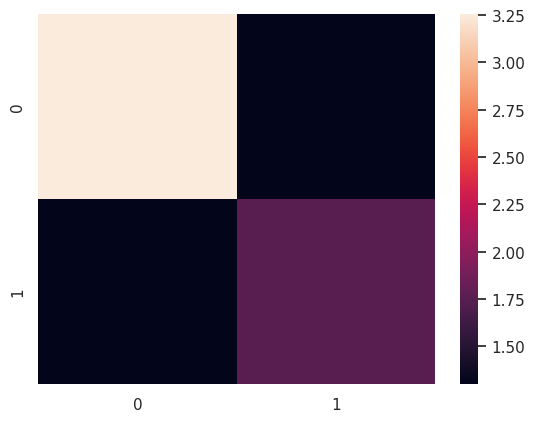

In [150]:
# Gráfico de Heatmap - Corresponde à Matriz de Covariância disposta em cores
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(np.cov(z,w))   # As variáveis z e w foram definidas e iniciadas um célula acima

### Exercício 6

Reescreva o programa do exercício anterior para outros valores de mx, my, sigmax e sigmay. Então observe os valores obtidos para covariância, correlação e coeficiente de correlação para os novos valores de x e y.

In [151]:
### Exercício 6:

### Exercício 7:
- Obtenção os Plotes das variáveis aleatórias z e w
- Obtenha os gráfico de pontos (scatter) das variáveis z e w
- Obtenha os gráfico de pontos (scatter) centralizados e normalizados das variáveis z e w.
- Obtenha os valores de variância, correlação e coeficiente de correlação entre as variáveis z e w.


In [152]:
# Exercício 7.a - Gráficos das variáveis z e w

In [153]:
# Exercício 7.b - Gráficos de pontos das variáveis z e w

In [154]:
# Exercício 7.c - Gráficos de pontos das variáveis z e w (centralizados e normalizados)

In [155]:
# Exercício 7.d - Obtenção da correlação, covariância e coeficiente de correlação das variáveis z e w

### Exercício 8
Reproduza o exercício 6, mas mude o valor da variável teta para np.pi/6 e gere novos valores para z e w.
Compare os resultados obtidos com os do exercício 6.


In [156]:
# Exercício 8.a - Gráficos das variáveis z e w

In [157]:
# Exercício 8.b - Gráficos de pontos das variáveis z e w

In [158]:
# Exercício 8.c - Gráficos de pontos das variáveis z e w (centralizados e normalizados)

In [159]:
# Exercício 8.d - Obtenção da correlação, covariância e coeficiente de correlação das variáveis z e w

### Exercício 9
Dadas as taxas de fertilidade e analfabetismo de algumas localidades, descritas nas variáveis: fetilidade e analfabetismo. Obtenha:
- O grafico de dispersão dessas duas variáveis.
- Obtenha o coefociente de correlação dessas duas variáveis e analise o grau de correlação delas.

Com relação ao coeficiente de correlação, considera-se que:
- 0.9 a 1 positivo ou negativo indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [160]:
fertilidade = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

In [161]:
analfebetismo = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

In [162]:
# Exercício 9.a: Gráfico de dispersão

In [163]:
# Exercício 9.b: Cálculo da taxa de correlação

## 4. Estatística com o Pacote Pandas

Como o pacote Pandas sobrecarrega as funções do NumPy, é possível utilizar as funcionalidades estatísitca a partir do Pandas.

Em termos de programação, os objetos do Pandas (Dataframe ou Série) subscrevem os métodos de cálculos das métricas estatísticas do numpy.

Assim, para um DataFrame X, temos:

- len(X) - Dimensão do objeto (Dataframe ou Serie)
- X.mean() - Média dos valores. No caso do Dataframe, calcula a média de cada coluna
- X.median() - Mediana dos valores
- X.max() - Valor máximo do objeto
- X.min() - Valor mínimo do objeto
- X.median() - Mediana dos valores
- X.quantile(q=n) - Quantile de uma porção (n é uma ponto flutuante maior que 0.0 e menor que 1.0)
- X.mode() - Encontra a moda dos valores do objeto (Valor mais frequente)
- X.var() - Variância dos valores (Medida de dispersão)
- X.std() - Desvio padrão dos valores
- X.corr() - Correlação entre as colunas de um Dataframe
- X.cov() - Covariância entre as colunas de um Dataframe

In [164]:
# Carregando o dataset Titanic - dados sobre os passageiros do Titanic
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
# Obtendo apenas a Serie referente às idades dos passageiros (Age)
df[['Age']].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [166]:
# Obtendo a idade média dos passageiros
df['Age'].mean()

np.float64(29.69911764705882)

In [167]:
# Obtendo a idade média dos passageiros
# Qual é a diferença para o exemplo anterior?
df[['Age']].mean()

Age    29.699118
dtype: float64

In [168]:
# Obtenha um DataFrame apenas com as clunas 'Age', 'Sex' e 'Pclass'

????


Object `??` not found.


In [169]:
# Obtendo um dataframe com somente os passageiros do sexo masculino
df[df['Sex']=="male"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [170]:
# Obtendo a idade média dos passeiros do sexo masculino
df[df['Sex']=="male"]['Age'].mean()

np.float64(30.72664459161148)

In [171]:
# Obtendo o número de passageiros do sexo masculino que sobreviveram
# Survived == 1 --> Sobreviveu
# Unsurvived == 0 --> Não Sobreviveu
df[df['Sex']=="male"]['Survived'].sum()

np.int64(109)

In [172]:
# Dataframe apenas com passageiros do sexo masculino que sobreviveram
df.loc[(df['Sex']=='male') & (df['Survived']==1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [173]:
# Obtenha a idade média dos passageiro da sexo feminino que sobreviveram ao naufrágio


In [174]:
# Calcule o percentual de sobreviventes por classe de passageiro (Pclass = 1, 2, 3)

In [175]:
# Verifique se há uma correlação entre sobrevivência (Survived) e a classe do passageiro (Pclass)
# Survived = 1 ; Sobrevivieu
# Survived = 0 ; Não Sobrevivieu
